**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [148]:
import torch
import numpy as np
from sklearn.model_selection import learning_curve

In [149]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [150]:
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [151]:
torch.random.manual_seed(42)
n_features = inputs_tensor.shape[1]

w = torch.randn(n_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w.shape)
print(b.shape)

torch.Size([3, 1])
torch.Size([1])


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [152]:
def model (x, w, b):
    z = torch.matmul(x, w) + b
    y_hat = 1 / (1 + torch.exp(-z))
    return y_hat

predictions = model(inputs_tensor, w, b)
print(predictions)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


It looks not OK. Probable reason could be wrong `w` and `b` initialization - probably they were too big.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [153]:
def binary_cross_entropy(predicted_probs, true_labels):
    # Clamp predictions to avoid log(0) error
    eps = 1e-7
    predicted_probs = torch.clamp(predicted_probs, eps, 1 - eps)

    # Compute binary cross-entropy loss
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    # Return average loss
    return torch.mean(loss)

# Calculate loss:
loss = binary_cross_entropy(predictions, targets_tensor)
print(f"Binary Cross-Entropy Loss: {loss.item():.4f}")

Binary Cross-Entropy Loss: 6.3770


5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [154]:
loss.backward()

print("Gradient w.r.t weights (w):")
print(w.grad)

print("\nGradient w.r.t bias (b):")
print(b.grad)

Gradient w.r.t weights (w):
tensor([[0.],
        [0.],
        [0.]])

Gradient w.r.t bias (b):
tensor([0.])


**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [155]:
torch.random.manual_seed(1)
w = torch.randn(n_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [156]:
predictions = model(inputs_tensor, w, b)
print(predictions)

# Calculate loss:
loss = binary_cross_entropy(predictions, targets_tensor)
print(f"Binary Cross-Entropy Loss: {loss.item():.4f}")

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)
Binary Cross-Entropy Loss: 0.6829


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  - Генерація прогнозів
  - Обчислення втрат
  - Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  - Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  - Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [157]:
w = torch.randn(n_features, 1) * 0.01
w.requires_grad_()
b = torch.randn(1) * 0.01
b.requires_grad_()

inputs_tensor = (inputs_tensor - inputs_tensor.mean(dim=0)) / inputs_tensor.std(dim=0)

learning_rate = 1.0
num_epochs = 1000

for epoch in range(num_epochs):
    predictions = model(inputs_tensor, w, b)
    loss = binary_cross_entropy(predictions, targets_tensor)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if(epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

final_predictions = model(inputs_tensor, w, b)
print(final_predictions)

Epoch 100/1000, Loss: 0.0110
Epoch 200/1000, Loss: 0.0055
Epoch 300/1000, Loss: 0.0037
Epoch 400/1000, Loss: 0.0027
Epoch 500/1000, Loss: 0.0022
Epoch 600/1000, Loss: 0.0018
Epoch 700/1000, Loss: 0.0016
Epoch 800/1000, Loss: 0.0014
Epoch 900/1000, Loss: 0.0012
Epoch 1000/1000, Loss: 0.0011
tensor([[1.9320e-03],
        [9.9782e-01],
        [9.9970e-01],
        [2.6456e-04],
        [9.9922e-01]], grad_fn=<MulBackward0>)


**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [158]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [159]:
from torch.utils.data import TensorDataset

inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

inputs_tensor = (inputs_tensor - inputs_tensor.mean(dim=0)) / inputs_tensor.std(dim=0)

dataset = TensorDataset(inputs_tensor, targets_tensor)

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [160]:
from torch.utils.data import DataLoader

batch_size = 5
train_dl = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True
)

for batch_inputs, batch_targets in train_dl:
    print("Batch inputs:", batch_inputs)
    print("Batch targets:", batch_targets)
    break

Batch inputs: tensor([[ 1.4099, -1.3543, -1.3448],
        [ 0.5287,  0.0763,  0.7420],
        [-0.9132, -0.5913, -0.8811],
        [ 0.2083,  1.5387,  0.2782],
        [ 0.2083,  1.5387,  0.2782]])
Batch targets: tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [165]:
import torch.nn as nn

class LogReg(nn.Module):
    def __init__(self, input_dim):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

input_dim = inputs_tensor.shape[1]
model = LogReg(input_dim)

print(model)

LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [166]:
import torch.optim as optim
import torch.nn.functional as F

opt = optim.SGD(model.parameters(), lr=0.01)
loss_fn = F.binary_cross_entropy

for xb, yb, in train_dl:
    preds = model(xb)
    break

initial_loss = loss_fn(preds, yb)

print(f"Initial loss: {initial_loss.item():.4f}")

Initial loss: 0.7307


The initial loss was 0.7307.

This value is quite high, which is expected because the model weights are random, and no training has been performed yet. Therefore, the model has not learned yet.

We need to perform several epochs of training with gradient descent to reduce the loss and improve predictions.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

Epoch [10/1000], Loss: 0.6210
Epoch [20/1000], Loss: 0.5285
Epoch [30/1000], Loss: 0.4567
Epoch [40/1000], Loss: 0.4005
Epoch [50/1000], Loss: 0.3557
Epoch [60/1000], Loss: 0.3196
Epoch [70/1000], Loss: 0.2897
Epoch [80/1000], Loss: 0.2649
Epoch [90/1000], Loss: 0.2438
Epoch [100/1000], Loss: 0.2259
Epoch [110/1000], Loss: 0.2105
Epoch [120/1000], Loss: 0.1970
Epoch [130/1000], Loss: 0.1851
Epoch [140/1000], Loss: 0.1747
Epoch [150/1000], Loss: 0.1653
Epoch [160/1000], Loss: 0.1569
Epoch [170/1000], Loss: 0.1494
Epoch [180/1000], Loss: 0.1425
Epoch [190/1000], Loss: 0.1363
Epoch [200/1000], Loss: 0.1306
Epoch [210/1000], Loss: 0.1253
Epoch [220/1000], Loss: 0.1205
Epoch [230/1000], Loss: 0.1160
Epoch [240/1000], Loss: 0.1119
Epoch [250/1000], Loss: 0.1080
Epoch [260/1000], Loss: 0.1044
Epoch [270/1000], Loss: 0.1011
Epoch [280/1000], Loss: 0.0979
Epoch [290/1000], Loss: 0.0949
Epoch [300/1000], Loss: 0.0922
Epoch [310/1000], Loss: 0.0895
Epoch [320/1000], Loss: 0.0871
Epoch [330/1000],

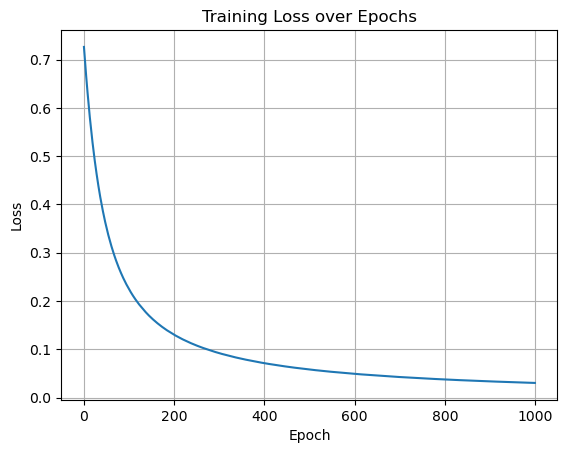

Final predictions: [[1.]
 [0.]
 [0.]
 [1.]
 [0.]]
True targets: [[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [167]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

# 1. Train the model
num_epochs = 1000
losses = fit_return_loss(num_epochs, model, loss_fn, opt, train_dl)

# 2. Plot the loss
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid()
plt.show()

# 3. Final predictions
for xb, yb in train_dl:
    final_preds = model(xb)
    break

print("Final predictions:", final_preds.detach().numpy().round())
print("True targets:", yb.numpy())